In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import repeat
from extra_packages.OutputInterface import OutputInterface
import extra_packages.sperhical_expansion as se
import SFALinearPulse as SFA_Lin
from matplotlib.colors import LogNorm
from scipy.special import sph_harm

In [2]:
import multiprocessing
#import ipyparallel as ipp
try:
    cpus = multiprocessing.cpu_count()
except NotImplementedError:
    cpus = 8   # arbitrary default
pool = multiprocessing.Pool(processes=cpus)

In [3]:
omega = 0.057     # Frequency of light
Up = 0.22         # Ponderomotive potential
CEP = np.pi/2     # This choice should make things symmetric

In [4]:
def plot_M_grid(M_grid, px_list, pz_list, log=False, log_scale = 1e-4):
    """
    Function to plot the calculated grids
    """
    plt.figure(facecolor='white', figsize=(12,6))

    M2_grid = np.abs(M_grid)**2
    MMax = np.max(M2_grid)

    if log:
        plt.imshow(np.flip(M2_grid,0), extent = (np.amin(pz_list), np.amax(pz_list), np.amin(px_list), np.amax(px_list)),
                   cmap='inferno', norm=LogNorm(vmin=MMax*log_scale, vmax=MMax),
                   interpolation = 'bicubic', aspect = 1.)
    else:
        plt.imshow(np.flip(M2_grid,0), extent = (np.amin(pz_list), np.amax(pz_list), np.amin(px_list), np.amax(px_list)),
                   cmap='inferno', interpolation = 'bicubic', aspect = 1.)

    plt.ylabel("$p_x$")
    plt.xlabel("$p_z$")
    plt.colorbar()
    plt.show()

In [5]:
file_name = 'output_files/N2.out'
output = OutputInterface(file_name)
orbital_nr = 5

if orbital_nr == None:
    orbital_nr = output.HOMO
else:
    output.load_orbital(orbital_nr)

Ip = -output.saved_orbitals[orbital_nr][0]
kappa = np.sqrt(2*Ip)
GTO_coeffs = np.array(output.output_GTOs(orbital_nr))

### First check which r value we should use for not handpicked values

In [7]:
n_r = 50
n_l = 30
r_lst = np.linspace(1, 15, n_r)
f_lms = []
for i, r in enumerate(r_lst):
    print(f'Evaluating at r={r:.4f} \t Nr. {i+1}/{n_r}')
    f_lms.append(se.spherical_expansion(lambda theta, phi: output.eval_orbital_spherical(r, theta, phi, orbital_nr), 50))
f_lms = np.array(f_lms)

Evaluating at r=1.0000 	 Nr. 1/50
Evaluating at r=1.2857 	 Nr. 2/50
Evaluating at r=1.5714 	 Nr. 3/50
Evaluating at r=1.8571 	 Nr. 4/50
Evaluating at r=2.1429 	 Nr. 5/50
Evaluating at r=2.4286 	 Nr. 6/50
Evaluating at r=2.7143 	 Nr. 7/50
Evaluating at r=3.0000 	 Nr. 8/50
Evaluating at r=3.2857 	 Nr. 9/50
Evaluating at r=3.5714 	 Nr. 10/50
Evaluating at r=3.8571 	 Nr. 11/50
Evaluating at r=4.1429 	 Nr. 12/50
Evaluating at r=4.4286 	 Nr. 13/50
Evaluating at r=4.7143 	 Nr. 14/50
Evaluating at r=5.0000 	 Nr. 15/50
Evaluating at r=5.2857 	 Nr. 16/50
Evaluating at r=5.5714 	 Nr. 17/50
Evaluating at r=5.8571 	 Nr. 18/50
Evaluating at r=6.1429 	 Nr. 19/50
Evaluating at r=6.4286 	 Nr. 20/50
Evaluating at r=6.7143 	 Nr. 21/50
Evaluating at r=7.0000 	 Nr. 22/50
Evaluating at r=7.2857 	 Nr. 23/50
Evaluating at r=7.5714 	 Nr. 24/50
Evaluating at r=7.8571 	 Nr. 25/50
Evaluating at r=8.1429 	 Nr. 26/50
Evaluating at r=8.4286 	 Nr. 27/50
Evaluating at r=8.7143 	 Nr. 28/50
Evaluating at r=9.0000 	 Nr. 

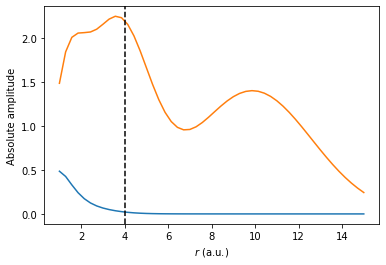

In [16]:
def radial(r):
    return r**(1/kappa - 1) * np.exp(-kappa*r)

plt.figure(facecolor='white')
sgn, l, m = 0, 1, 1
plt.plot(r_lst, np.abs(f_lms[:, sgn, l, m]))
plt.plot(r_lst, np.abs(f_lms[:, sgn, l, m]) / radial(r_lst))
plt.axvline(4, ls='--', color='k')                              # r = 7 seems like a solid choice!
plt.xlabel('$r$ (a.u.)')
plt.ylabel('Absolute amplitude')
plt.show()

/home/mads/.local/lib/python3.8/site-packages/pyshtools/shclasses/shcoeffs.py:2820: ComplexWarning: Casting complex values to real discards the imaginary part
  spectrum[:, :lmax] = _np.fliplr(mnegative)[:, :lmax]
/home/mads/.local/lib/python3.8/site-packages/pyshtools/shclasses/shcoeffs.py:2821: ComplexWarning: Casting complex values to real discards the imaginary part
  spectrum[:, lmax:] = mpositive
/home/mads/.local/lib/python3.8/site-packages/pyshtools/shclasses/shcoeffs.py:3141: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


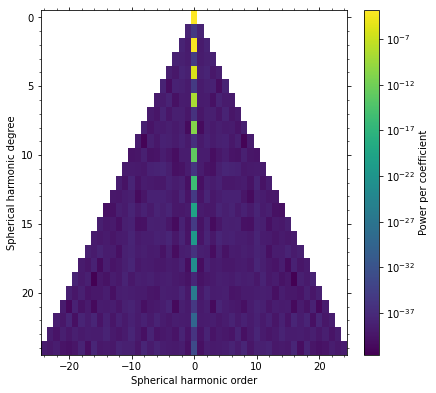

array([[[-3.98888589e-02+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j],
        [ 6.04102152e-18+0.00000000e+00j,
         -1.46789524e-20-3.78616090e-19j,
          0.00000000e+00+0.00000000e+00j, ...,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j],
        [-2.64171017e-02+0.00000000e+00j,
         -9.26856600e-20-7.72918226e-20j,
         -2.51567843e-19-2.86461781e-19j, ...,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j],
        ...,
        [ 7.62627808e-15+0.00000000e+00j,
         -8.46589164e-20-9.44142548e-20j,
          1.52600309e-19-3.15307860e-21j, ...,
          5.11539243e-20+1.64147012e-19j,
          0.00000000e+00+0.00000000e+00j

In [9]:
se.spherical_expansion(lambda theta, phi: output.eval_orbital_spherical(4., theta, phi, orbital_nr), 50, True)

### Now use the handpicked values and match the rest to the above found

In [9]:
#matched_rs = np.loadtxt('asymptotic_matching/CHBrClF_rs.txt')
matched_rs = np.loadtxt('matched_r.txt')
r_array = se.convert_list_to_clm_array(matched_rs)
clm_array_matched = se.get_as_from_r_array(lambda r, theta, phi : output.eval_orbital_spherical(r, theta, phi, orbital_nr), r_array, 50, Ip)

Calculating for l = 0 and m = 0,

TypeError: <lambda>() got an unexpected keyword argument 'orbital_nr'

In [1]:
flm_list = se.spherical_expansion(lambda theta, phi : output.eval_orbital_spherical(5, theta, phi, orbital_nr), 50, plot_coeff=True)
print(flm_list[0,0,0])

NameError: name 'se' is not defined

In [8]:
print(clm_array_matched[0,0,0])
print(r_array[0,0,0])

(-4.295925546353562+0j)
5.996739455192319


In [6]:
#np.save('CHBrClF_clms', clm_array_matched)
clm_array_matched = np.load('asymptotic_matching/CHBrClF_clms.npy')

In [7]:
# Extend to higher l values!
clm_array_extended = se.extend_to_higher_l(output.eval_orbital_spherical, clm_array_matched, 25, 7., Ip)

In [40]:
# Calculate values matched in same r for comparison! 
clm_array_unmatched = se.get_as_coeffs(output.eval_orbital_spherical, 15., 50, Ip, abs_thresh=1e-8)

In [14]:
clm_array_matched[:,:5].shape

(2, 5, 12)

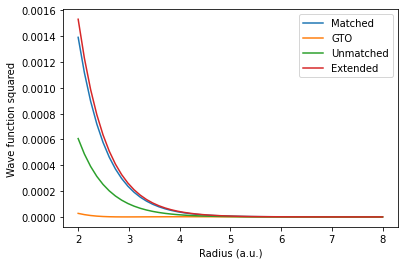

In [19]:
phi = 0
theta = np.pi/2

n_r = 50
r_lst = np.linspace(2, 8, n_r)

plt.figure(facecolor='white')
plt.plot(r_lst, np.abs(se.eval_asymptotic(r_lst, theta, phi, clm_array_matched, Ip))**2, label='Matched')
plt.plot(r_lst, np.abs(output.eval_orbital_spherical(r_lst, theta, phi))**2, label='GTO')
plt.plot(r_lst, np.abs(se.eval_asymptotic(r_lst, theta, phi, clm_array_unmatched, Ip))**2, label='Unmatched')
plt.plot(r_lst, np.abs(se.eval_asymptotic(r_lst, theta, phi, clm_array_extended, Ip))**2, label='Extended')
plt.legend()
plt.xlabel('Radius (a.u.)')
plt.ylabel('Wave function squared')
#plt.ylim(0, 0.1)
plt.show()

### Let's see if there is any difference!

In [34]:
print(clm_array_extended[0, 12, 1])
print(clm_array_matched[0, 2, 1])
print(clm_array_unmatched[0, 12, 1])

(0.01707644850915418-0.029576960865281634j)
(1.3149200122254954-2.2243882716648606j)
(0.01707644850915418-0.029576960865281634j)


In [32]:
N = 50
pz_list = np.linspace(-1.5, 1.5, N)
px_list = np.linspace(-1, 1., N)
pzGrid, pxGrid = np.meshgrid(pz_list, px_list)
py = 0.

In [33]:
SP_asymp_martiny = SFA_Lin.SFALinearPulse(Ip, Up, omega, 2, CEP, target_="asymp_martiny")

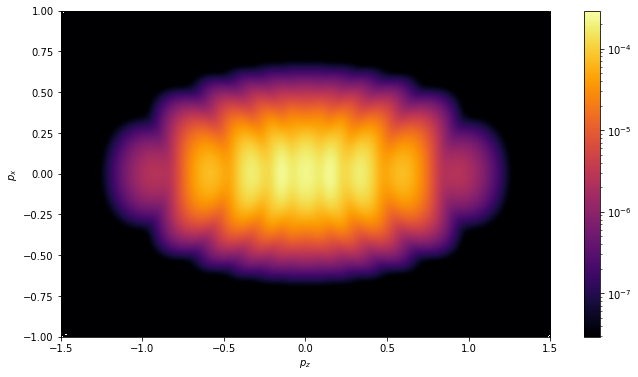

In [27]:
M_matched = np.array(pool.starmap(SP_asymp_martiny.Mxz_List, zip(pxGrid, repeat(py), pzGrid, repeat(clm_array_matched[:,:1]))))
plot_M_grid(M_matched, px_list, pz_list, log=True)

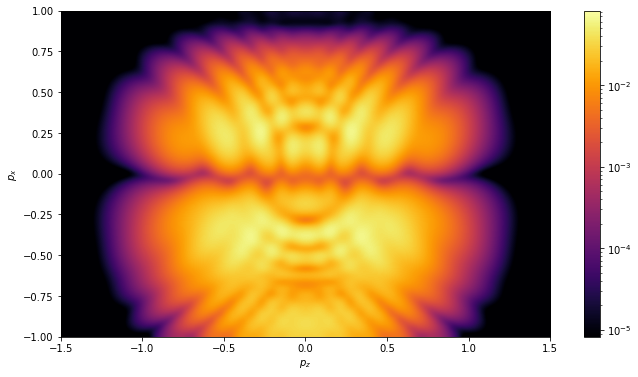

In [28]:
M_matched = np.array(pool.starmap(SP_asymp_martiny.Mxz_List, zip(pxGrid, repeat(py), pzGrid, repeat(clm_array_extended))))
plot_M_grid(M_matched, px_list, pz_list, log=True)

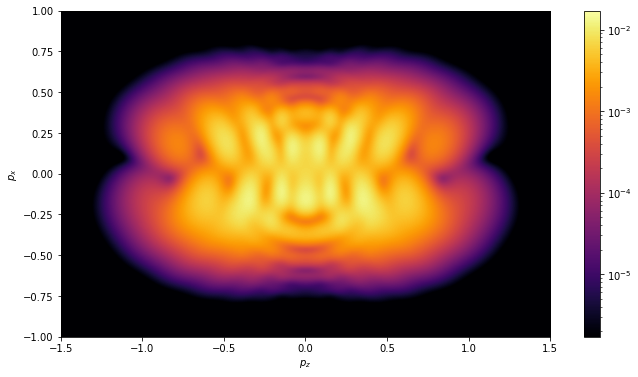

In [48]:
M_matched = np.array(pool.starmap(SP_asymp_martiny.Mxz_List, zip(pxGrid, repeat(py), pzGrid, repeat(clm_array_unmatched))))
plot_M_grid(M_matched, px_list, pz_list, log=True)

### The one below is an old one, where there was only up to l=8 (including). These were matched also by hand, but in another 'run'.

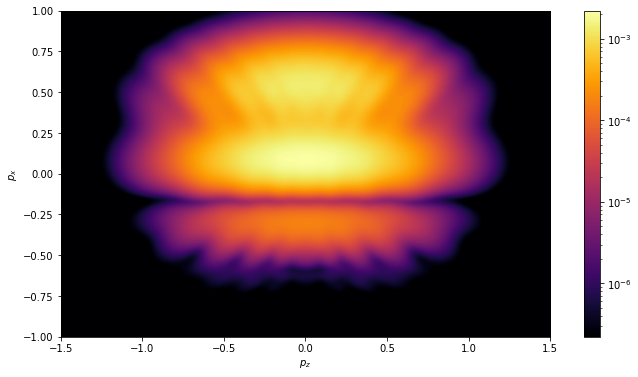

In [32]:
plot_M_grid(M_matched, px_list, pz_list, log=True)

### Let's try to look at the individual atoms...

In [6]:
output.atom_info()

Number 	 Name 	 Position (x,y,z) [Bohr]
1 	 C 	 [0.021693802120485304, 0.015122028377497227, 0.0016532990876668156]
2 	 H 	 [-1.8947329679769394, -0.08671509610494427, -0.6548519223053252]
3 	 BR 	 [-0.039763536612042544, -0.06316949428520921, 3.6433452531148487]
4 	 CL 	 [1.4210197748629787, 2.775065184296422, -1.186741162810796]
5 	 F 	 [1.2977133252359165, -1.986816431126928, -0.8387569722486773]


In [22]:
atom_nr = 2

n_r = 50
n_l = 30
r_lst = np.linspace(0.1, 15, n_r)
f_lms = []
for i, r in enumerate(r_lst):
    print(f'Evaluating at r={r:.4f} \t Nr. {i+1}/{n_r}')
    f_lms.append(se.spherical_expansion(lambda theta, phi: output.eval_atom_spherical(r, theta, phi, atom_nr, atom_frame=True), 50))
f_lms = np.array(f_lms)

Evaluating at r=0.1000 	 Nr. 1/50
Evaluating at r=0.4041 	 Nr. 2/50
Evaluating at r=0.7082 	 Nr. 3/50
Evaluating at r=1.0122 	 Nr. 4/50
Evaluating at r=1.3163 	 Nr. 5/50
Evaluating at r=1.6204 	 Nr. 6/50
Evaluating at r=1.9245 	 Nr. 7/50
Evaluating at r=2.2286 	 Nr. 8/50
Evaluating at r=2.5327 	 Nr. 9/50
Evaluating at r=2.8367 	 Nr. 10/50
Evaluating at r=3.1408 	 Nr. 11/50
Evaluating at r=3.4449 	 Nr. 12/50
Evaluating at r=3.7490 	 Nr. 13/50
Evaluating at r=4.0531 	 Nr. 14/50
Evaluating at r=4.3571 	 Nr. 15/50
Evaluating at r=4.6612 	 Nr. 16/50
Evaluating at r=4.9653 	 Nr. 17/50
Evaluating at r=5.2694 	 Nr. 18/50
Evaluating at r=5.5735 	 Nr. 19/50
Evaluating at r=5.8776 	 Nr. 20/50
Evaluating at r=6.1816 	 Nr. 21/50
Evaluating at r=6.4857 	 Nr. 22/50
Evaluating at r=6.7898 	 Nr. 23/50
Evaluating at r=7.0939 	 Nr. 24/50
Evaluating at r=7.3980 	 Nr. 25/50
Evaluating at r=7.7020 	 Nr. 26/50
Evaluating at r=8.0061 	 Nr. 27/50
Evaluating at r=8.3102 	 Nr. 28/50
Evaluating at r=8.6143 	 Nr. 

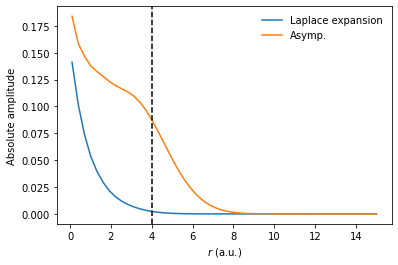

In [23]:
def radial(r):
    return r**(1/kappa - 1) * np.exp(-kappa*r)

plt.figure(facecolor='white')
sgn, l, m = 0, 0, 0
plt.plot(r_lst, np.abs(f_lms[:, sgn, l, m]), label='Laplace expansion')
plt.plot(r_lst, np.abs(f_lms[:, sgn, l, m]) / radial(r_lst), label='Asymp.')
plt.axvline(4, ls='--', color='k')                              # r = 7 seems like a solid choice!
plt.xlabel('$r$ (a.u.)')
plt.ylabel('Absolute amplitude')
plt.legend(frameon=False)
#plt.ylim(0., 0.01)
plt.show()

/home/mads/.local/lib/python3.8/site-packages/pyshtools/shclasses/shcoeffs.py:2820: ComplexWarning: Casting complex values to real discards the imaginary part
  spectrum[:, :lmax] = _np.fliplr(mnegative)[:, :lmax]
/home/mads/.local/lib/python3.8/site-packages/pyshtools/shclasses/shcoeffs.py:2821: ComplexWarning: Casting complex values to real discards the imaginary part
  spectrum[:, lmax:] = mpositive
/home/mads/.local/lib/python3.8/site-packages/pyshtools/shclasses/shcoeffs.py:3141: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


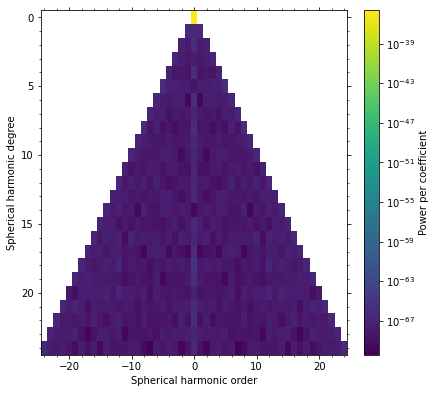

array([[[-5.39751796e-18+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j],
        [ 2.22982919e-33+0.00000000e+00j,
          1.78198300e-33-8.51876245e-34j,
          0.00000000e+00+0.00000000e+00j, ...,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j],
        [-2.93704317e-33+0.00000000e+00j,
         -3.57600521e-34-1.34149220e-34j,
         -7.77062212e-34-3.39574922e-34j, ...,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j],
        ...,
        [-3.10556204e-33+0.00000000e+00j,
          2.49483254e-35+1.01761143e-34j,
         -5.78543641e-34-1.07778002e-34j, ...,
         -3.79835602e-34+1.47583457e-33j,
          0.00000000e+00+0.00000000e+00j

In [19]:
se.spherical_expansion(lambda theta, phi: output.eval_atom_spherical(15., theta, phi, 2, atom_frame=True), 50, True)

/home/mads/.local/lib/python3.8/site-packages/pyshtools/shclasses/shcoeffs.py:2820: ComplexWarning: Casting complex values to real discards the imaginary part
  spectrum[:, :lmax] = _np.fliplr(mnegative)[:, :lmax]
/home/mads/.local/lib/python3.8/site-packages/pyshtools/shclasses/shcoeffs.py:2821: ComplexWarning: Casting complex values to real discards the imaginary part
  spectrum[:, lmax:] = mpositive
/home/mads/.local/lib/python3.8/site-packages/pyshtools/shclasses/shcoeffs.py:3141: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


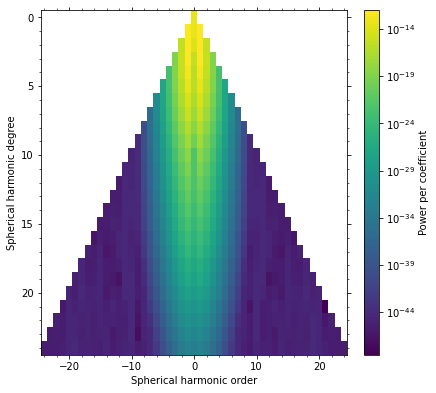

array([[[-7.71838158e-07+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j],
        [-8.14760977e-07+0.00000000e+00j,
          1.20933651e-06-2.31438632e-06j,
          0.00000000e+00+0.00000000e+00j, ...,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j],
        [-3.86222691e-07+0.00000000e+00j,
          1.60229570e-06-3.06491855e-06j,
         -3.56895713e-08-6.13078261e-08j, ...,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j],
        ...,
        [-1.34628985e-15+0.00000000e+00j,
          1.96670255e-15-3.43313749e-15j,
         -4.39378338e-16-8.27923850e-16j, ...,
          6.31446272e-23+7.07748094e-23j,
          0.00000000e+00+0.00000000e+00j

In [27]:
se.spherical_expansion(lambda theta, phi: output.eval_atom_spherical(15., theta, phi, atom_nr), 50, True)